# Horse Racing

# I. Introduction

Gambling on the horse racing results is a breathtaking entertainment. The results of horse races don’t come from nowhere. They are related to different factors such as the horses and jockeys, the track and distance, etc. We wonder whether we can “predict” the results of horse races and build our “formula” to win the rewards. In this project, we will use data from past races and try different machine learning techniques to make predictions.

The dataset is from kaggle (www.kaggle.com/lantanacamara/hong-kong-horse-racing) which is extracted from the website of the Hong Kongm Jockey Club. The file race-result-race.csv describes the races. Each entry in another file race-result-horse.csv corresponds to one horse in a race.

 # II.  Data Pre-processing

### Variable Description: 
• finishing_position: the rank of the horse. (E.g. the horse with finishing_position 1 is the first to finish)

• horse_number: the number for the horse in the specific race. (Note that the same horse may have different numbers in different races)

• horse_name: English name of the horse.

• horse_id: ID of the horse. (The ID for a horse is unique in all the races)

• jockey: the one who rides the horse in the race. (A jockey can ride different horses in the races)

• trainer: the one who trains the horse. (Multiple horses from a trainer can appear in the same race)

• actual_weight: the extra weight that the horse carries in the race. (The horses with better perfor- mances in the previous races should carry heavier extra weights, to make the race more competitive6)

• declared_horse_weight: the weight of the horse on date of the race.

• draw: the position of the horse at the starting point7. The inner positions are usually advantageous and correspond to smaller draw numbers.

• length_behind_winner: the length behind the winner at the finish line. The unit is the “horse length”.

• running_position_1: the rank of the horse at the first timing point.

• running_position_2: the rank of the horse at the second timing point.
...

• running_position_i: the rank of the horse at the ith timing point. (The running position will be “NA” if the total distance of the race is short and the horses don’t go across the particular timing point)

• finish_time: the total time from the starting point to the finish line. The unit is “second”.

• win_odds: the ratio between the reward you will get and the money you bet, supposing that you will win. The odds are usually determined automatically by the total money bet on each horses8. 

• race_id: the ID of the race for this entry. The race_id is consistent in the two data files.

In [43]:
import pandas as pd
import numpy as np

In [44]:
rrh = pd.read_csv('race-result-horse.csv')
rrh.shape

(30189, 19)

In [45]:
#  drop the rows where the “finish_position” is not a number (e.g. WV-A, WV). There may be accidents.
rrh = rrh[rrh.finishing_position.isin(['1','2','3','4','5','6','7','8','9','10','11','12','13','14'])].reset_index()
rrh.head()

,index,finishing_position,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,running_position_1,running_position_2,running_position_3,running_position_4,finish_time,win_odds,running_position_5,running_position_6,race_id
0,0,1,1.0,DOUBLE DRAGON,K019,B Prebble,D Cruz,133,1032,1,-,1.0,2.0,2.0,1.0,1.22.33,3.8,NaN,NaN,2014-001
1,1,2,2.0,PLAIN BLUE BANNER,S070,D Whyte,D E Ferraris,133,1075,13,2,8.0,9.0,9.0,2.0,1.22.65,8,NaN,NaN,2014-001
2,2,3,10.0,GOLDWEAVER,P072,Y T Cheng,Y S Tsui,121,1065,3,2,2.0,1.0,1.0,3.0,1.22.66,5.7,NaN,NaN,2014-001
3,3,4,3.0,SUPREME PROFIT,P230,J Moreira,C S Shum,132,1222,2,2,6.0,4.0,5.0,4.0,1.22.66,6.1,NaN,NaN,2014-001
4,4,5,7.0,THE ONLY KID,H173,Z Purton,K W Lui,125,1136,9,4-1/4,9.0,10.0,10.0,5.0,1.23.02,6.1,NaN,NaN,2014-001


In [46]:
horse_id = rrh.horse_id.unique()
no_horse = len(horse_id)
horse_index = range(no_horse)

jockey = rrh.jockey.unique()
no_jockey = len(jockey)
jockey_index = range(no_jockey)

trainer = rrh.trainer.unique()
no_trainer = len(trainer)
trainer_index = range(no_trainer)

print(' Number of horses: ' , no_horse , '\n', 'Number of Jokeys: ' , no_jockey ,'\n', 'Number of Trainers: ' , no_trainer)


 Number of horses:  2155 
 Number of Jokeys:  105 
 Number of Trainers:  93


In [47]:
rrh.head()

,index,finishing_position,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,length_behind_winner,running_position_1,running_position_2,running_position_3,running_position_4,finish_time,win_odds,running_position_5,running_position_6,race_id
0,0,1,1.0,DOUBLE DRAGON,K019,B Prebble,D Cruz,133,1032,1,-,1.0,2.0,2.0,1.0,1.22.33,3.8,NaN,NaN,2014-001
1,1,2,2.0,PLAIN BLUE BANNER,S070,D Whyte,D E Ferraris,133,1075,13,2,8.0,9.0,9.0,2.0,1.22.65,8,NaN,NaN,2014-001
2,2,3,10.0,GOLDWEAVER,P072,Y T Cheng,Y S Tsui,121,1065,3,2,2.0,1.0,1.0,3.0,1.22.66,5.7,NaN,NaN,2014-001
3,3,4,3.0,SUPREME PROFIT,P230,J Moreira,C S Shum,132,1222,2,2,6.0,4.0,5.0,4.0,1.22.66,6.1,NaN,NaN,2014-001
4,4,5,7.0,THE ONLY KID,H173,Z Purton,K W Lui,125,1136,9,4-1/4,9.0,10.0,10.0,5.0,1.23.02,6.1,NaN,NaN,2014-001


In [48]:
import warnings
warnings.filterwarnings("ignore")

In [49]:
# Takes a while to run

# Add a column named recent_6_runs to the dataframe, which records the recent ranks of the horse in each entry. 
# The ranks are separated by “/”, and a record is like 1/2/6/3/4/7.

# Add a column named recent_ave_rank for each entry to the dataframe, 
# which records the average rank of the recent 6 runs of a horse

rrh['recent_6_runs'] = '0'
rrh['recent_ave_rank'] = '7'

for i in range(len(rrh['finishing_position'])):
    
    temp = rrh[ : (i + 1)][rrh.horse_id == rrh.horse_id[i]][['finishing_position']]
    temp = temp['finishing_position'].values.tolist()[::-1]
  
    rrh['recent_6_runs'][i] = '/'.join(temp[:6])
    
    if len(temp) != 0:
        temp_int = map(int,temp)    # convert string to integer
        temp_ave = np.mean(list(temp_int))
        rrh['recent_ave_rank'][i] = temp_ave


In [50]:
rrh.head()

,index,finishing_position,horse_number,horse_name,horse_id,jockey,trainer,actual_weight,declared_horse_weight,draw,...,running_position_2,running_position_3,running_position_4,finish_time,win_odds,running_position_5,running_position_6,race_id,recent_6_runs,recent_ave_rank
0,0,1,1.0,DOUBLE DRAGON,K019,B Prebble,D Cruz,133,1032,1,...,2.0,2.0,1.0,1.22.33,3.8,NaN,NaN,2014-001,1,1
1,1,2,2.0,PLAIN BLUE BANNER,S070,D Whyte,D E Ferraris,133,1075,13,...,9.0,9.0,2.0,1.22.65,8,NaN,NaN,2014-001,2,2
2,2,3,10.0,GOLDWEAVER,P072,Y T Cheng,Y S Tsui,121,1065,3,...,1.0,1.0,3.0,1.22.66,5.7,NaN,NaN,2014-001,3,3
3,3,4,3.0,SUPREME PROFIT,P230,J Moreira,C S Shum,132,1222,2,...,4.0,5.0,4.0,1.22.66,6.1,NaN,NaN,2014-001,4,4
4,4,5,7.0,THE ONLY KID,H173,Z Purton,K W Lui,125,1136,9,...,10.0,10.0,5.0,1.23.02,6.1,NaN,NaN,2014-001,5,5


In [51]:
# Add column of Distance

# The distance could be 1000, 1200, 1400, 1600, 1800, 2000, 2400, etc. 
# Some horses are good at short-distance races, while some are good at long-distance races.

rrh['race_distance'] = '0'
rrr = pd.read_csv('race-result-race.csv')
for i in range(len(rrr['race_id'])):
    distance = rrr['race_distance'][i]
    rrh['race_distance'][rrh.race_id == rrr.race_id[i]] = distance


In [52]:
# Add HorseWin, HorseRankTop3, HorseRankTop50Percent for use in Part3

rrh['HorseWin'] = (rrh.finishing_position == '1') + 0
rrh['HorseRankTop3'] = (rrh.finishing_position == '1') + (rrh.finishing_position == '2') + (rrh.finishing_position == '3') + 0

index=rrh.index[rrh['finishing_position'] == '1'].tolist()

rrh['HorseRankTop50Percent'] = '0'
for i in range(len(index)-1):
    rrh['HorseRankTop50Percent'][index[i]:(index[i] + int(round(0.5 * (index[i + 1] - index[i]))))] = '1'
rrh['HorseRankTop50Percent'][index[len(index) - 1]:(index[len(index) - 1] + 6)] = '1'


In [53]:
# Divide data into training set and test set.
# Training set contains all the races with race_id no more than “2016-327” (first 80%), 
# Test set contains the rest of races (last 20%)

temp_index = max(rrh.index[rrh['race_id'] == '2016-327'].tolist())
training = rrh[:(temp_index + 1)]
testing = rrh[(temp_index + 1):]


In [54]:
# Calculate jockey_ave_rank, trainer_ave_rank for training data
# jockey_ave_rank: records the average rank of the jockey in the training data
# trainer_ave_rank:records the average rank of the trainer in the training data


training['jockey_ave_rank'] = '7'

for i in range(len(jockey)):
    temp = training[training.jockey == jockey[i]][['finishing_position']]
    temp = temp['finishing_position'].values.tolist()
    if len(temp) != 0:
        temp_int = map(int,temp)
        temp_ave = np.mean(list(temp_int))
        training['jockey_ave_rank'][training.jockey == jockey[i]] = temp_ave


training['trainer_ave_rank'] = '7'

for i in range(len(trainer)):
    temp = training[training.trainer == trainer[i]][['finishing_position']]
    temp = temp['finishing_position'].values.tolist()
    if len(temp) != 0:
        temp_int = map(int,temp)
        temp_ave = np.mean(list(temp_int))
        training['trainer_ave_rank'][training.trainer == trainer[i]] = temp_ave


In [55]:
training.to_csv('training.csv')

In [56]:
####----Refer jockey_ave_rank and trainer_ave_rank of testing data to training data---####

testing['jockey_ave_rank'] = '7'
testing_jockey = testing['jockey'].unique()
for i in range(len(testing_jockey)):
    if testing_jockey[i] in training['jockey'].unique():
        testing['jockey_ave_rank'][testing.jockey == testing_jockey[i]] = training[training.jockey == testing_jockey[i]]['jockey_ave_rank'].tolist()[0]

testing['trainer_ave_rank'] = '7'
testing_trainer=testing['trainer'].unique()
for i in range(len(testing_trainer)):
    if testing_trainer[i] in training['trainer'].unique():
        testing['trainer_ave_rank'][testing.trainer == testing_trainer[i]] = training[training.trainer == testing_trainer[i]]['trainer_ave_rank'].tolist()[0]



In [57]:
testing.to_csv('testing.csv')

# III.  Classification

In [59]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import f1_score
import time

In [60]:
training = pd.read_csv('training.csv')
testing = pd.read_csv('testing.csv')
X_train = training[['actual_weight','declared_horse_weight','draw','win_odds','jockey_ave_rank','trainer_ave_rank',
'recent_ave_rank','race_distance']]
y_train = training[['HorseWin','HorseRankTop3','HorseRankTop50Percent']]
X_test = testing[['actual_weight','declared_horse_weight','draw','win_odds','jockey_ave_rank','trainer_ave_rank',
'recent_ave_rank','race_distance']]
y_test = testing[['HorseWin','HorseRankTop3','HorseRankTop50Percent']]

kfold = KFold(n_splits = 5)


### 3.1 Logistic Regression

In [62]:
lr_model = LogisticRegression()

#### Cross validation
Cross validation can estimate the expected extra-sample error. Since static split of training and testing data cannot build a very good model given out-of-sample data, CV efficiently utilizes the data and also improves performance in predicting out-of-sample data, thus avoiding overfitting problem.

In [64]:
score_lr_Win = cross_val_score(lr_model,X_train,y_train['HorseWin'],cv = kfold,scoring = 'f1')
score_lr_Top3 = cross_val_score(lr_model,X_train,y_train['HorseRankTop3'],cv = kfold,scoring = 'f1')
score_lr_Top50 = cross_val_score(lr_model,X_train,y_train['HorseRankTop50Percent'],cv = kfold,scoring = 'f1')
print("Cross Validation score for Logistic Regression:",'\n', "HorseWin: ",score_lr_Win,'\n',"HorseTop3: ", 
      score_lr_Top3,'\n',"HorseTop50Percent: ", score_lr_Top50 )

Cross Validation score for Logistic Regression: 
 HorseWin:  [0.07575758 0.06185567 0.03626943 0.02604167 0.03133159] 
 HorseTop3:  [0.6295754  0.41979726 0.43651753 0.39736685 0.34700315] 
 HorseTop50Percent:  [0.79684582 0.72035324 0.70503001 0.70109801 0.68616697]


#### Get Predictions 

HorseWin: If the horse was in the first finish speeds, ‘1’ else ‘0’.

HorseRankTop3: If the horse was in the top 3 finish speeds, ‘1’ else ‘0’.

HorseRankTop50Percent: If the horse was in the top 50 percent finish speeds, ’1’ else ‘0’.



In [65]:
start_time1 = time.time()
lr_model.fit(X_train,y_train['HorseWin'])
lr_Win = lr_model.predict(X_test)
lr_model.fit(X_train,y_train['HorseRankTop3'])
lr_Top3 = lr_model.predict(X_test)
lr_model.fit(X_train,y_train['HorseRankTop50Percent'])
lr_Top50 = lr_model.predict(X_test)
print('Running time for logistic rergession is: ' , time.time() - start_time1)

Running time for logistic rergession is:  0.470181941986084


In [66]:
# Write predictions into csv file.
a = pd.DataFrame()
a['RaceID'] = testing['race_id']
a['HorseID'] = testing['horse_id']
a['HorseWin'] = lr_Win
a['HorseRankTop3'] = lr_Top3
a['HorseRankTop50Percent'] = lr_Top50
a.to_csv('lr_predictions.csv')

### Evaluation of Predictions _ F1 score

Reasons of choosing F1: For imbalanced data, 1 is more important than 0, model may try to increase accuracy by predicting all 0, while in this case, f1 score is close to 0 while accuracy is close to 1. So for imbalanced data, f1 score (similarly TNR, NPV) is good choice.

F1 = 2 * (precision * recall) / (precision + recall)

Precision P = TP / (TP + FP), probability that one classified positive instance is classified correctly.

Recall R = TP / (TP +FN) , percentage of truly positive instances correctly classified. 



In [67]:
print(' F1 score of HorseWin: ' , f1_score(y_test['HorseWin'],a['HorseWin']),'\n', 'F1 score of HorseRankTop3: ',
      f1_score(y_test['HorseRankTop3'],a['HorseRankTop3']),'\n', 'F1 score of HorseRankTop50Percent: ',
      f1_score(y_test['HorseRankTop50Percent'],a['HorseRankTop50Percent']))

 F1 score of HorseWin:  0.06085192697768762 
 F1 score of HorseRankTop3:  0.3601800900450225 
 F1 score of HorseRankTop50Percent:  0.6987718164188753


### 3.2 Naïve Bayes

Supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of independence between every pair of features.

In [68]:
nb_model = GaussianNB()

In [71]:
score_nb_Win=cross_val_score(nb_model,X_train,y_train['HorseWin'],cv=kfold,scoring='f1')
score_nb_Top3=cross_val_score(nb_model,X_train,y_train['HorseRankTop3'],cv=kfold,scoring='f1')
score_nb_Top50=cross_val_score(nb_model,X_train,y_train['HorseRankTop50Percent'],cv=kfold,scoring='f1')
print("Cross Validation score for Naive Bayes: ",'\n', "HorseWin: ",score_nb_Win,'\n',"HorseTop3: ", 
      score_nb_Top3,'\n',"HorseTop50Percent: ", score_nb_Top50 )

Cross Validation score for Naive Bayes:  
 HorseWin:  [0.36181818 0.34763476 0.31038251 0.28542304 0.28210526] 
 HorseTop3:  [0.61533173 0.53181818 0.53748126 0.51724138 0.51145602] 
 HorseTop50Percent:  [0.7785575  0.72748447 0.7187017  0.71444738 0.71051152]


In [72]:
start_time2 = time.time()
nb_model.fit(X_train,y_train['HorseWin'])
nb_Win = nb_model.predict(X_test)
nb_model.fit(X_train,y_train['HorseRankTop3'])
nb_Top3 = nb_model.predict(X_test)
nb_model.fit(X_train,y_train['HorseRankTop50Percent'])
nb_Top50 = nb_model.predict(X_test)
print('Running time for Naive Bayes in scikit-learn is: ' , time.time()-start_time2)

Running time for Naive Bayes in scikit-learn is:  0.06885504722595215


In [73]:
b = pd.DataFrame()
b['RaceID'] = testing['race_id']
b['HorseID'] = testing['horse_id']
b['HorseWin'] = nb_Win
b['HorseRankTop3'] = nb_Top3
b['HorseRankTop50Percent'] = nb_Top50
b.to_csv('nb_predictions.csv')

In [74]:
print(' F1 score of HorseWin: ' , f1_score(y_test['HorseWin'],b['HorseWin']),'\n', 'F1 score of HorseRankTop3: ',
      f1_score(y_test['HorseRankTop3'],b['HorseRankTop3']),'\n', 'F1 score of HorseRankTop50Percent: ',
      f1_score(y_test['HorseRankTop50Percent'],b['HorseRankTop50Percent']))

 F1 score of HorseWin:  0.2820945945945946 
 F1 score of HorseRankTop3:  0.5055718475073313 
 F1 score of HorseRankTop50Percent:  0.7183563287342531


### 3.3 SVM Classifier

SVM: Non-probabilistic binary classifier. The core of SVM is to maximize the margin between different classes. It can be used for linear classification or non-linear classification depends on its kernel function evaluated at a subset of training data points. The intuition of SVM is like if we cannot find a linearly separable hyperplane in the original space of X, we try to find a linearly separable hyperplane in the space spanned by higher order of X like Z=X^2. It mainly utilizes kernel function to realize the goal.

In [76]:
svm_model = SVC(kernel = 'linear')

In [77]:
# Takes a while to run
score_svm_Win = cross_val_score(svm_model,X_train,y_train['HorseWin'],cv = kfold,scoring = 'f1')
score_svm_Top3 = cross_val_score(svm_model,X_train,y_train['HorseRankTop3'],cv = kfold,scoring = 'f1')
score_svm_Top50 = cross_val_score(svm_model,X_train,y_train['HorseRankTop50Percent'],cv = kfold,scoring = 'f1')

In [82]:
print("Cross Validation score for SVC: ",'\n', "HorseWin: ",score_svm_Win,'\n',"HorseTop3: ", 
      score_svm_Top3,'\n',"HorseTop50Percent: ", score_svm_Top50 )

Cross Validation score for SVC:  
 HorseWin:  [0.         0.04675325 0.01591512 0.01558442 0.00529101] 
 HorseTop3:  [0.60883117 0.41626214 0.41712538 0.40024184 0.33722438] 
 HorseTop50Percent:  [0.79498956 0.7108044  0.69620522 0.69368993 0.68375   ]


In [86]:
# SVM takes a while to predict

start_time4 = time.time()
svm_model.fit(X_train,y_train['HorseWin'])
svm_Win = svm_model.predict(X_test)
svm_model.fit(X_train,y_train['HorseRankTop3'])
svm_Top3 = svm_model.predict(X_test)
svm_model.fit(X_train,y_train['HorseRankTop50Percent'])
svm_Top50 = svm_model.predict(X_test)
print('Running time for SVM is:',time.time() - start_time4)

Running time for SVM is: 712.8456130027771


In [87]:
c = pd.DataFrame()
c['RaceID'] = testing['race_id']
c['HorseID'] = testing['horse_id']
c['HorseWin'] = svm_Win
c['HorseRankTop3'] = svm_Top3
c['HorseRankTop50Percent'] = svm_Top50
c.to_csv('svm_predictions.csv')

In [88]:
print(' F1 score of HorseWin: ' , f1_score(y_test['HorseWin'],c['HorseWin']),'\n', 'F1 score of HorseRankTop3: ',
      f1_score(y_test['HorseRankTop3'],c['HorseRankTop3']),'\n', 'F1 score of HorseRankTop50Percent: ',
      f1_score(y_test['HorseRankTop50Percent'],c['HorseRankTop50Percent']))

 F1 score of HorseWin:  0.08712871287128714 
 F1 score of HorseRankTop3:  0.35953930896344516 
 F1 score of HorseRankTop50Percent:  0.6938979659886629


### 3.4 Random Forest

 A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. 

In [89]:
rf_model = RandomForestClassifier()

In [90]:
score_rf_Win = cross_val_score(rf_model,X_train,y_train['HorseWin'],cv = kfold,scoring = 'f1')
score_rf_Top3 = cross_val_score(rf_model,X_train,y_train['HorseRankTop3'],cv = kfold,scoring = 'f1')
score_rf_Top50 = cross_val_score(rf_model,X_train,y_train['HorseRankTop50Percent'],cv = kfold,scoring = 'f1')

In [91]:
print("Cross Validation score for Random Forest: ", "HorseWin: ",score_rf_Win,'\n',"HorseTop3: ", 
      score_rf_Top3,'\n',"HorseTop50Percent: ", score_rf_Top50 )

Cross Validation score for Random Forest:  HorseWin:  [0.43351548 0.16551724 0.13793103 0.11954023 0.13888889] 
 HorseTop3:  [0.591133   0.43030654 0.39607603 0.37394451 0.34944238] 
 HorseTop50Percent:  [0.74502793 0.6698348  0.64947987 0.65257067 0.62848228]


In [92]:
start_time5 = time.time()
rf_model.fit(X_train,y_train['HorseWin'])
rf_Win = rf_model.predict(X_test)
rf_model.fit(X_train,y_train['HorseRankTop3'])
rf_Top3 = rf_model.predict(X_test)
rf_model.fit(X_train,y_train['HorseRankTop50Percent'])
rf_Top50 = rf_model.predict(X_test)
print('Running time for Random Forest is:',time.time() - start_time5)

Running time for Random Forest is: 1.181518793106079


In [93]:
d = pd.DataFrame()
d['RaceID'] = testing['race_id']
d['HorseID'] = testing['horse_id']
d['HorseWin'] = rf_Win
d['HorseRankTop3'] = rf_Top3
d['HorseRankTop50Percent'] = rf_Top50
d.to_csv('rf_predictions.csv')

In [94]:
print(' F1 score of HorseWin: ' , f1_score(y_test['HorseWin'],d['HorseWin']),'\n', 'F1 score of HorseRankTop3: ',
      f1_score(y_test['HorseRankTop3'],d['HorseRankTop3']),'\n', 'F1 score of HorseRankTop50Percent: ',
      f1_score(y_test['HorseRankTop50Percent'],d['HorseRankTop50Percent']))

 F1 score of HorseWin:  0.18472468916518653 
 F1 score of HorseRankTop3:  0.3752380952380952 
 F1 score of HorseRankTop50Percent:  0.6407942238267149


# IV. Regression

In [95]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
import math
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor

### 4.1 Support Vector Regression Model (SVR) 

In [96]:
training = pd.read_csv('training.csv')
testing = pd.read_csv('testing.csv')
X_train = training[['actual_weight','declared_horse_weight','draw','win_odds','jockey_ave_rank','trainer_ave_rank',
'recent_ave_rank','race_distance']]

In [97]:
y_train0 = training['finish_time']
y_train = []
for i in range(len(y_train0)):
    sep = y_train0[i].split('.')
    y_train.append(int(sep[0]) * 60 + int(sep[1]) + int(sep[2]) / 100.0)

In [98]:
X_test = testing[['actual_weight','declared_horse_weight','draw','win_odds','jockey_ave_rank','trainer_ave_rank',
'recent_ave_rank','race_distance']]

In [99]:
y_test = []
y_test0 = testing['finish_time']
for i in range(len(y_test0)):
    sep = y_test0[i].split('.')
    y_test.append(int(sep[0]) * 60 + int(sep[1]) + int(sep[2]) / 100.0)

In [100]:
top1_index = testing.index[testing['finishing_position']==1].tolist()

#### Evaluation:
1. MSE
2. Top_1: the percentage/probality when your prediction of top_1 horse(horse with shortest finish_time) for each race is actually the true top_1 horse.

3. Top_3: percentage/probability when your prediction of top_1 horse for each race is actually within true top_3 horses for each race. 

4. Average_rank: the average true rank of top_1 horse based on your prediction over all races.

For example, when you predict for 3 races and your predicted top_1 horse is actually ranking 1, 3, 5 in these races. Top_1 is 1/3, Top_3 is 2/3 and Average_Rank is 3.0.


In [102]:
def Evaluation(predict):
    top1_predict_index = []
    for i in range(len(top1_index)-1):
        temp = np.argmin(predict[top1_index[i]:top1_index[i + 1]])
        top1_predict_index.append(top1_index[i] + temp)
    temp0 = np.argmin(predict[top1_index[len(top1_index) - 1]:])
    top1_predict_index.append(top1_index[len(top1_index) - 1] + temp0)

    RMSE = math.sqrt(sum((np.array(predict) - np.array(y_test)) ** 2)) / len(y_test)
    TOP_1 = float(len(set(top1_predict_index) & set(top1_index))) / len(top1_predict_index)

    TOP_3 = (testing['finishing_position'][top1_predict_index].tolist().count(1) + testing['finishing_position'][top1_predict_index].tolist().count(2)\
          + testing['finishing_position'][top1_predict_index].tolist().count(3)) / float(len(top1_predict_index))
    Average_Rank = sum(testing['finishing_position'][top1_predict_index]) / float(len(top1_predict_index))
    return (RMSE,TOP_1,TOP_3,Average_Rank)


#### Tuning parameters for SVR

C is penalty parameter for error. If C is large, it means high penalty for error, which may cause overfitting; while if C is small, it means flat margins, which may cause under-fitting. Epsilon specifies the range of no-penalty district around margin. Larger epsilon means higher tolerance of error.

Conducted small scale grid search for selection of C and epsilon. I tried values from 2^(-4) to 2^(2) for both C and epsilon, and I found C and epsilon actually do not have significant effect on the results with regard to 4 evaluation statistics. I choose the relative better pair of (C, epsilon)=( 2^(-2), 2^(-4) ).

In [103]:
svr_model = SVR(kernel = 'linear', C = math.pow(2,-2), epsilon = math.pow(2,-4))
svr_model.fit(X_train, y_train)
svr_predict = svr_model.predict(X_test)
print('Evaluation statistics for SVR model:',Evaluation(svr_predict))

Evaluation statistics for SVR model: (0.020751422599109344, 0.2615062761506276, 0.5418410041841004, 4.150627615062762)


In [104]:
###---Normalization----###

scaler = StandardScaler().fit(X_train)
X_train_trans = scaler.transform(X_train)
yy = pd.DataFrame()
yy['finish_time'] = y_train
scaler1 = StandardScaler().fit(yy)
y_train_trans = scaler1.transform(yy)
X_test_trans = scaler.transform(X_test)

In [105]:
# fit normalized data to svr_model
svr_model.fit(X_train_trans,y_train_trans)
svr_predict_norm = svr_model.predict(X_test_trans)
svr_norm_evaluation = Evaluation(svr_predict_norm)

In [106]:
# use training data mean and variance to get RMSE after normalization
y_test_norm = (np.array(y_test)-scaler1.mean_) / math.sqrt(scaler1.var_)
svr_norm_RMSE = math.sqrt(sum((np.array(svr_predict_norm) - y_test_norm) ** 2)) / len(y_test)
print('Normalized evaluation statistics for SVR model:',(svr_norm_RMSE,) + svr_norm_evaluation[1:])


Normalized evaluation statistics for SVR model: (0.001102896559042184, 0.27615062761506276, 0.5669456066945606, 3.937238493723849)


### 4.2 Gradient Boosting Regression Tree Model (GBRT)

Gradient Boosting Regression Tree Model is a generalization of boosting technique to arbitrary differentiable loss functions.
It is used here becauese of its natural handling of data of mixed type, great predictive power and robustness to outliers in output space (via robust loss functions).

#### Tuning Parameters for GBRT:
Loss function: It has various loss functions including ls, lad, huber, quantile. Choose loss=’qunatile’, since for default values of other parameters, this loss function performs best according to TOP_1 and TOP_3 evaluation statistics.

learning_rate: controls the contribution of each weak classifier (tree).

n_estimators: represents the number of weak learners (tree). Since boosting combines the output of many weak classifiers, the larger n_estimators, the more robust the model is and the better results are.

max_depth: maximum nodes of the tree

I chose learning_rate = 0.01, n_estimators = 10, max_depth = 2, since I found by assigning these three values to parameters, TOP_1 = 0.99, TOP_3 = 1, which performs the best in predicting winner of horse races.

In [107]:
gbrt_model = GradientBoostingRegressor(loss = 'quantile',learning_rate = 0.01, n_estimators = 10, max_depth = 2)
gbrt_model.fit(X_train,y_train)
gbrt_predict = gbrt_model.predict(X_test)
print('Evaluation statistics for GBRT model:' , Evaluation(gbrt_predict))

Evaluation statistics for GBRT model: (0.3905420430430017, 0.997907949790795, 1.0, 1.00418410041841)


In [108]:
# fit normalized data to gbrt_model
gbrt_model.fit(X_train_trans,y_train_trans)
gbrt_predict_norm = gbrt_model.predict(X_test_trans)
gbrt_norm_evaluation = Evaluation(gbrt_predict_norm)

# use training data mean and variance to get RMSE after normalization
gbrt_norm_RMSE = math.sqrt(sum((np.array(gbrt_predict_norm) - y_test_norm) ** 2)) / len(y_test)
print('Normalized evaluation statistics for GBRT model:',(gbrt_norm_RMSE,) + gbrt_norm_evaluation[1:])

Normalized evaluation statistics for GBRT model: (0.021074151260729753, 0.997907949790795, 1.0, 1.00418410041841)


In [121]:
f = pd.DataFrame()
f['RaceID'] = testing['race_id']
f['HorseID'] = testing['horse_id']
f['svr_predict'] = svr_predict
f['svr_predict_norm'] = svr_predict_norm
f['gbrt_predict'] = gbrt_predict
f['gbrt_predict_norm'] = gbrt_predict_norm
f.to_csv('reg_prediction.csv')

# V. Betting Strategy

Betting strategy is to bet all $1 for the predicted winning horse for each race. 

Concretely, if our prediction is correct for the winning horse, we will receive $1 × odds money. 

Otherwise, we will lose $1. 

The final result is positive if we win some money and negative if we lose.

For 4 classification models, if there are more than 1 HorseWin in a race in predictions, I will choose the one with smallest odds, since as odds increase, winning probability decreases.

In [109]:
import pandas as pd
import numpy as np

In [110]:
testing = pd.read_csv('testing.csv')
champion_index = testing[testing['HorseWin'] == 1].index.tolist()
champion_odds = testing[testing['HorseWin'] == 1]['win_odds'].tolist()

In [111]:
def count_range_in_list(li, min, max):
    ctr = 0
    for x in li:
        if min <= x <= max:
            ctr += 1
    return ctr

In [112]:
def ele_in_list(li, min, max):
    ele = []
    for x in li:
        if min <= x <= max:
            ele.append(x)
    return ele

In [113]:
def betting_result(champion_odds,champion_index,prediction):
    money=0
    for i in range(len(champion_index)-1):
        ctr= count_range_in_list(prediction,champion_index[i],champion_index[i+1]-1)
        if ctr==0:
            money=money-1
        elif ctr==1:
            money=money-1+champion_odds[i]
        else:
            ele_list=ele_in_list(prediction,champion_index[i],champion_index[i+1]-1)
            if min(ele_list)==champion_index[i]:
                money=money-1+champion_odds[i]
            else:
                money=money-1
    ctr = count_range_in_list(prediction, champion_index[len(champion_index)-1],len(testing['HorseWin'])-1)
    if ctr == 0:
        money = money - 1
    elif ctr == 1:
        money = money - 1 + champion_odds[len(champion_index)-1]
    else:
        ele_list = ele_in_list(prediction, champion_index[len(champion_index)-1], len(testing['HorseWin'])-1)
        if min(ele_list)==champion_index[len(champion_index)-1]:
            money = money - 1 + champion_odds[len(champion_index)-1]
        else:
            money = money - 1
    return money

In [114]:
lr = pd.read_csv('lr_predictions.csv')
lr_index = lr[lr['HorseWin'] == 1].index.tolist()
print('Betting result for Logistic Regression model:',betting_result(champion_odds,champion_index,lr_index))

Betting result for Logistic Regression model: -440.9


In [115]:
nb = pd.read_csv('nb_predictions.csv')
nb_index = nb[nb['HorseWin'] == 1].index.tolist()
print('Betting result for Naive Bayes model:', betting_result(champion_odds,champion_index,nb_index))


Betting result for Naive Bayes model: 1554.5999999999992


In [116]:
rf = pd.read_csv('rf_predictions.csv')
rf_index = rf[rf['HorseWin'] == 1].index.tolist()
print('Betting result for Random Forest model:',betting_result(champion_odds,champion_index,rf_index))

Betting result for Random Forest model: 260.30000000000007


In [117]:
svm = pd.read_csv('svm_predictions.csv')
svm_index = svm[svm['HorseWin'] == 1].index.tolist()
print('Betting result for SVM model:',betting_result(champion_odds,champion_index,svm_index))


Betting result for SVM model: -371.1


For 4 regression models, I choose the horse with shortest predicted finish_time as the unique winning horse. 

In [118]:
def prediction(predict):
    top1_predict_index = []
    for i in range(len(champion_index)-1):
        temp = np.argmin(predict[champion_index[i]:champion_index[i + 1]])
        top1_predict_index.append(champion_index[i]+temp)
    temp0 = np.argmin(predict[champion_index[len(champion_index) - 1]:])
    top1_predict_index.append(champion_index[len(champion_index) - 1] + temp0)
    return top1_predict_index


In [122]:
reg_prediction = pd.read_csv('reg_prediction.csv')
reg_svr = reg_prediction['svr_predict']
reg_svr_norm = reg_prediction['svr_predict_norm']
reg_gbrt = reg_prediction['gbrt_predict']
reg_gbrt_norm = reg_prediction['gbrt_predict_norm']

In [123]:
svr_index = prediction(reg_svr)
svr_norm_index = prediction(reg_svr_norm)
gbrt_index = prediction(reg_gbrt)
gbrt_norm_index = prediction(reg_gbrt_norm)

In [124]:
print('Betting result for SVR model:',betting_result(champion_odds,champion_index,svr_index))
print('Betting result for SVR (Normalized) model:',betting_result(champion_odds,champion_index,svr_norm_index))
print('Betting result for GBRT model:',betting_result(champion_odds,champion_index,gbrt_index))
print('Betting result for GBRT (Normalized) model:',betting_result(champion_odds,champion_index,gbrt_norm_index))

Betting result for SVR model: 1453.499999999999
Betting result for SVR (Normalized) model: 1549.999999999999
Betting result for GBRT model: 1556.0999999999985
Betting result for GBRT (Normalized) model: 1556.0999999999985


#### It seems 2 regression algorithms perform well and normalization improves performance of SVR.

#### Improvement:

I set threshold for the average rank and odds. For example, we only bet the horse whose odd is in the smallest 5, and recent_ave_rank is also in smallest 5. This means we decreases the risk of betting in horses with bad recent performance. If the horse cannot satisfy the criteria, we do not bet.

In [125]:
def imp_betting(champion_odds,champion_index,prediction):
    money = 0
    for i in range(len(champion_index) - 1):
        ctr = count_range_in_list(prediction, champion_index[i], champion_index[i + 1] - 1)
        if ctr >= 1:
            temp_odds = testing['win_odds'].tolist()[champion_index[i]:champion_index[i + 1]]
            temp_ave_rank = testing['recent_ave_rank'].tolist()[champion_index[i]:champion_index[i + 1]]
            seq_odds = sorted(temp_odds)
            seq_ave_rank = sorted(temp_ave_rank)
            ele_list = ele_in_list(prediction,champion_index[i],champion_index[i+1]-1)
            if (seq_odds.index(testing['win_odds'][ele_list[0]]) <= 5) and (seq_ave_rank.index(testing['recent_ave_rank'][ele_list[0]]) <= 5):
                money = money - 1
                if ele_list[0] == champion_index[i]:
                    money = money + champion_odds[i]
    return money


In [126]:
print('Improved betting result for Logistic Regression model:',imp_betting(champion_odds,champion_index,lr_index))
print('Improved betting result for Naive Bayes model:',imp_betting(champion_odds,champion_index,nb_index))
print('Improved betting result for Random Forest model:',imp_betting(champion_odds,champion_index,rf_index))
print('Improved betting result for SVR model:',imp_betting(champion_odds,champion_index,svr_index))
print('Improved betting result fo GBRT model:',imp_betting(champion_odds,champion_index,gbrt_index))


Improved betting result for Logistic Regression model: 18.499999999999996
Improved betting result for Naive Bayes model: 270.2000000000001
Improved betting result for Random Forest model: 80.80000000000001
Improved betting result for SVR model: 9.900000000000002
Improved betting result fo GBRT model: -25.1


However, it seems that setting threshold cannot improve the results for those method whose results are already positive. It only decreases losses by decreasing risk.

# VI. Visualization

### 6.1 Line Chart of Recent Racing Result

Visualize the history racing result of some specific horse.

Interactive: takes a horse ID as input, and outputs a line chart that shows the finishing positions of 6 recent races that the horse attended.

In [177]:
import pandas as pd
import matplotlib.pyplot as plt

In [149]:
def linechart(horse_id):
    recent_6_runs = training[training.horse_id == horse_id]['recent_6_runs'][-1:].tolist()[0]

    recent_6_runs = list(map(int,recent_6_runs.split('/')))[::-1]
    print(recent_6_runs)
    game_id = training[training.horse_id == horse_id][['race_id']][-6:]
    print(game_id)
    plt.plot(game_id.iloc[:,0], recent_6_runs, marker = '+')
    plt.xlabel('Game_id')
    plt.ylabel('Ranks of recent 6 runs')
    plt.title('Line Chart of recent 6 runs'+'- Horse ' + horse_id)
    plt.ylim((0, 14))
    plt.show()


[10, 7, 1, 5, 11, 11]
        race_id
14301  2015-370
18383  2015-698
18836  2015-737
20210  2016-061
20675  2016-099
23499  2016-327


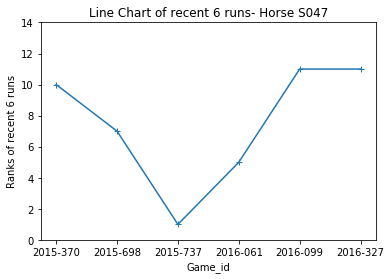

In [150]:
training = pd.read_csv('training.csv')
horse_id = 'S047'
linechart(horse_id)

### 6.2 Scatter Plot of Win Rate and Number of Wins 

The x-axis is the win rate, and the y-axis is the number of wins. 

Set a threshold and label the name of the horses (or jockeys) who reach the threshold. E.g., if a horse’s win rate is larger than 0.5, and wins more than 4 games, then you should annotate the point of this horse with its name. 

Goal: to find the “best” horse and the “best” jockey. Intuitively, the “best” one should have a high win rate and have won a large number of games.

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

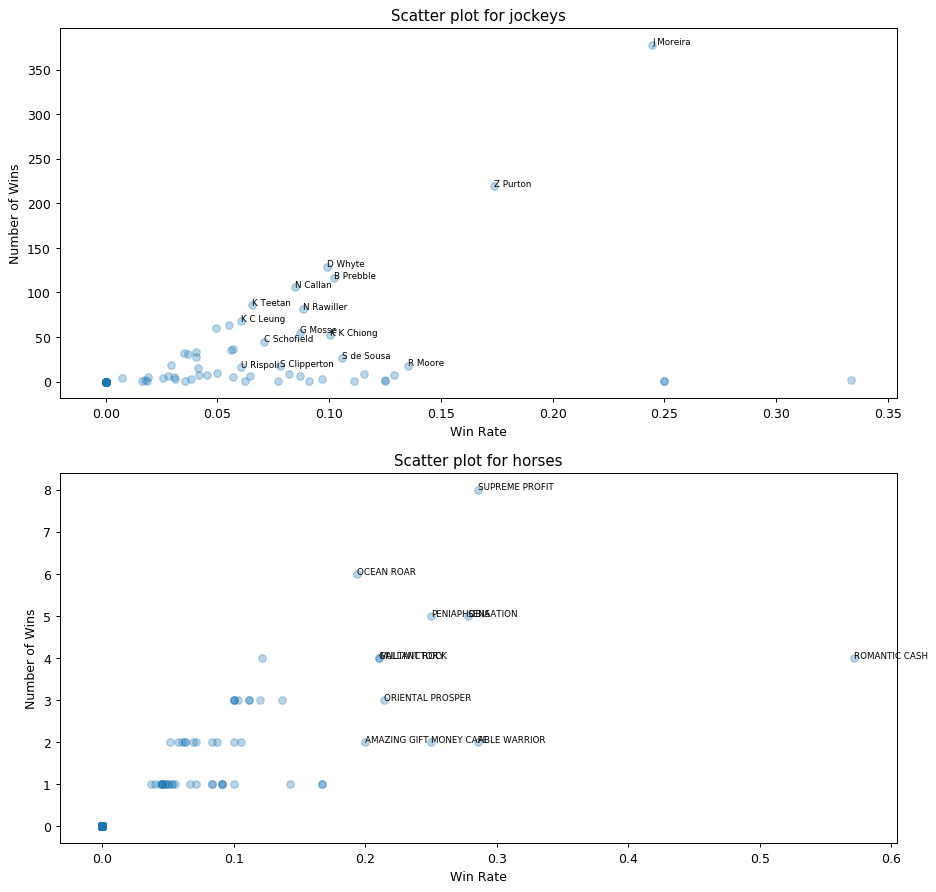

In [155]:
training = pd.read_csv('training.csv')
jockey = training.jockey.unique()
a = pd.DataFrame()
a['jockey'] = jockey
a['no_win'] = 0
a['win_rate'] = 0.0
for i in range(len(jockey)):
    ranks = training[training.jockey == jockey[i]]['finishing_position'].tolist()
    a['no_win'][i] = ranks.count(1)
    a['win_rate'][i] = ranks.count(1) / float(len(ranks))

horse = training.horse_name.unique()
b = pd.DataFrame()
b['horse'] = horse
b['no_win'] = 0
b['win_rate'] = 0.0
for i in range(len(jockey)):
    ranks=training[training.horse_name == horse[i]]['finishing_position'].tolist()
    b['no_win'][i] = ranks.count(1)
    b['win_rate'][i] = ranks.count(1) / float(len(ranks))

figure(num = None, figsize = (12, 12), dpi = 90, facecolor = 'w', edgecolor = 'k')
plt.subplot(2,1,1)
plt.scatter(a['win_rate'],a['no_win'],alpha = 0.3)
plt.title('Scatter plot for jockeys')
plt.xlabel('Win Rate')
plt.ylabel('Number of Wins')
for i in range(len(jockey)):
    if a['no_win'][i] >= 10 and a['win_rate'][i] >= 0.06:
        plt.annotate(a['jockey'][i],(a['win_rate'][i],a['no_win'][i]),size = 7)


plt.subplot(2,1,2)
plt.scatter(b['win_rate'],b['no_win'],alpha=0.3)
plt.title('Scatter plot for horses')
plt.xlabel('Win Rate')
plt.ylabel('Number of Wins')
for i in range(len(horse)):
    if b['no_win'][i] >= 2 and b['win_rate'][i] >= 0.15:
        plt.annotate(b['horse'][i],(b['win_rate'][i],b['no_win'][i]),size = 7)
        

plt.show()

The best jockey is J Moreira. Since he has the highest number of wins and very high win rate.


The best horse is Romantic Cash, since it has the highest win rate and its ranks are very stable.

### 6.3 Pie Chart of the Draw Bias Effect

Pie chart is a way to visualize the distribution of categorical data

#### Goal: explore the effect of draw bias in horse racing. 

The draw refers to the stall a horse will start the race from. The draw is normally chosen at random on the day the horses are declared to run. Obviously, the inside lane would hold an edge over the field as they have a shorter distance to the bend, in comparison to the other lanes.

In [159]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [160]:
training = pd.read_csv('training.csv')

win_prob = []
for i in range(1,16,1):
    win_prob.append(training[training.draw == i]['finishing_position'].tolist().count(1) / float(len(training[training.draw == i])))

print(win_prob)


[0.11540526033279656, 0.09339774557165861, 0.0962566844919786, 0.07441113490364026, 0.09129967776584318, 0.07568438003220612, 0.06935483870967742, 0.07542051003798156, 0.07633587786259542, 0.0661111111111111, 0.06157354618015964, 0.07340553549939831, 0.06041923551171394, 0.0777479892761394, 0.0]


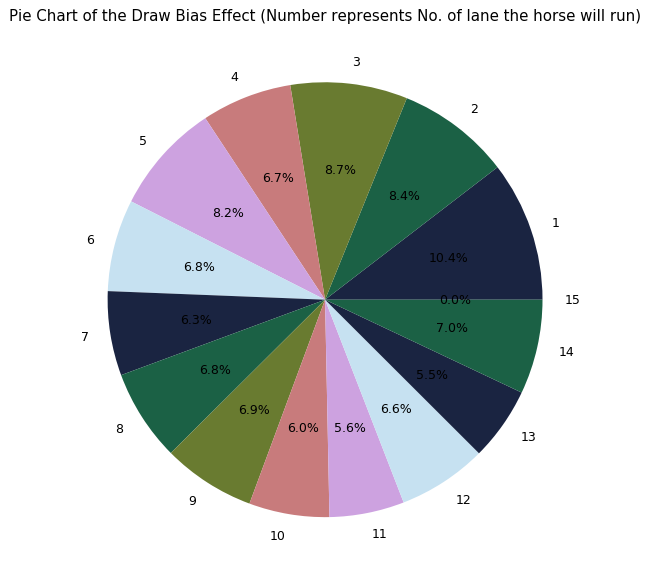

In [172]:
labels = ['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15']
figure(num = None, figsize = (8, 8), dpi = 90, facecolor = 'w', edgecolor = 'k')
plt.pie(win_prob,labels = labels,autopct = '%1.1f%%', colors = sns.color_palette("cubehelix"))
plt.title('Pie Chart of the Draw Bias Effect (Number represents No. of lane the horse will run)')
plt.show()

#### Low draws indeed have a considerable advantage, as we can see that as draw increases, the winning probability decreases.

### 6.4 Bar Chart of the Feature Importances

Use random forest classifier to evaluate the importance of the features, which measures how much each feature decreases the weighted impurity in a tree. 

In [164]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [165]:
training = pd.read_csv('training.csv')
rf_model = RandomForestClassifier()
X_train = training[['actual_weight','declared_horse_weight','draw','win_odds','jockey_ave_rank','trainer_ave_rank',
'recent_ave_rank','race_distance']]
y_train = training[['HorseWin','HorseRankTop3','HorseRankTop50Percent']]
rf_model.fit(X_train,y_train['HorseWin'])
features = 'actual_weight','declared_horse_weight','draw','win_odds','jockey_ave_rank','trainer_ave_rank','recent_ave_rank','race_distance'
importance = rf_model.feature_importances_
indices = np.argsort(importance)[::-1]
print(importance[indices])
print(indices)

[0.23440396 0.19382871 0.14697765 0.10202755 0.09069338 0.08813974
 0.08415344 0.05977556]
[6 3 1 0 5 4 2 7]


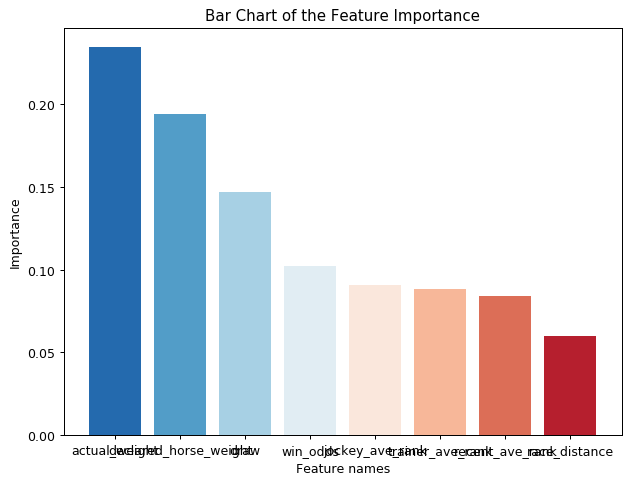

In [175]:
figure(num = None, figsize = (8, 6), dpi = 90, facecolor = 'w', edgecolor = 'k')
plt.bar(range(len(features)),importance[indices],color = sns.color_palette("RdBu_r", 8))
plt.xticks(range(len(features)),features)
plt.xlabel('Feature names')
plt.ylabel('Importance')
plt.title('Bar Chart of the Feature Importance')
plt.show()

#### We find that actual_weight, declared_horse_weight and draw affect the most, while race_distance has the least effect

### 6.5 Visualize SVM

Since it is hard to visualize high-dimensional data, for the input data X, we only consider these two features: recent_rank and jockey_ave_rank. Also, for the target y, we only care about whether the finishing position is in top 50%. 

In [167]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
import matplotlib.patches as mpatches

In [168]:
training = pd.read_csv('training.csv')
X = training[['recent_ave_rank','jockey_ave_rank']]
y = training['HorseRankTop50Percent']
svm_model = SVC(kernel = 'linear')
svm_model.fit(X,y)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [169]:
def make_meshgrid(x, y, h = .02):

    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [170]:
def plot_contours(clf, xx, yy, **params):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out


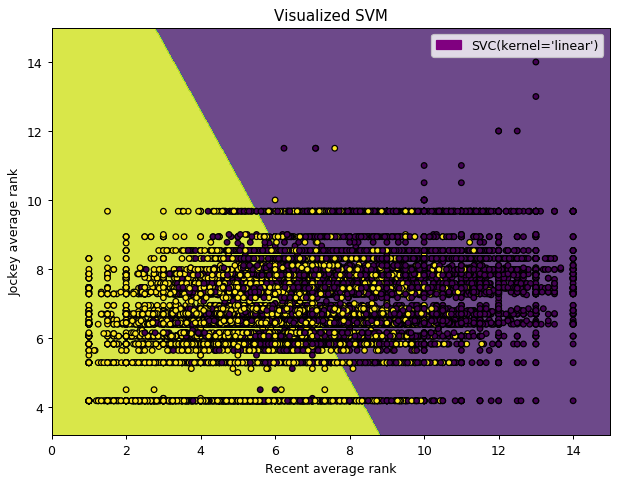

In [178]:
X0, X1 = X['recent_ave_rank'], X['jockey_ave_rank']
xx, yy = make_meshgrid(X0, X1)

figure(num = None, figsize = (8, 6), dpi = 90, facecolor = 'w', edgecolor = 'k')
plot_contours(svm_model,xx, yy, alpha = 0.8)
plt.scatter(X0, X1, c = y,  s = 20, edgecolors = 'k')
plt.title('Visualized SVM')
plt.xlabel('Recent average rank')
plt.ylabel('Jockey average rank')
patch = mpatches.Patch(color = 'purple',label = 'SVC(kernel=\'linear\')')
plt.legend(handles = [patch])
plt.show()

Linear kernel seems not bad in two-feature SVM classification. But there are still plenty of points cross the margin which cannot be classified correctly.